In [2]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue


BFS: ['A', 'B', 'D', 'G', 'J']


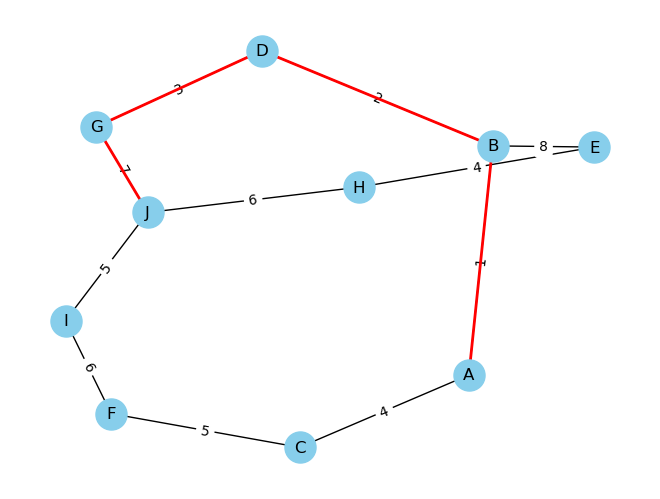

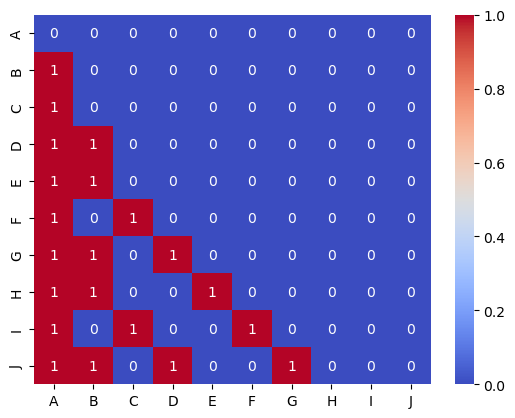

DFS: ['A', 'C', 'F', 'I', 'J']


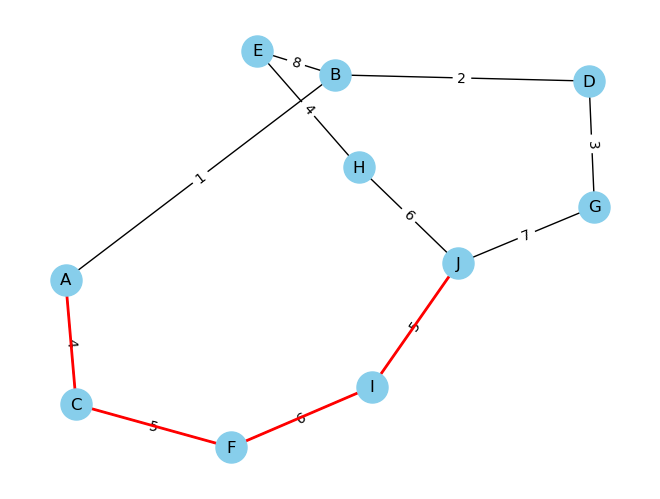

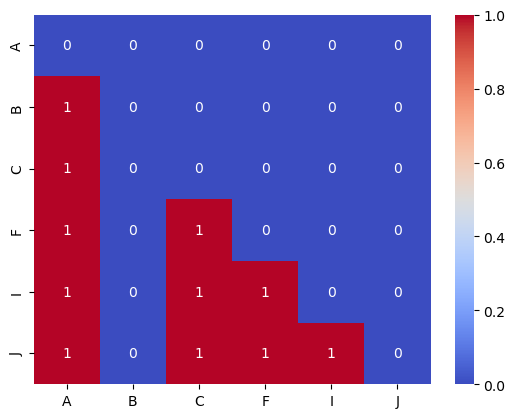

UCS: ['A', 'B', 'D', 'G', 'J']


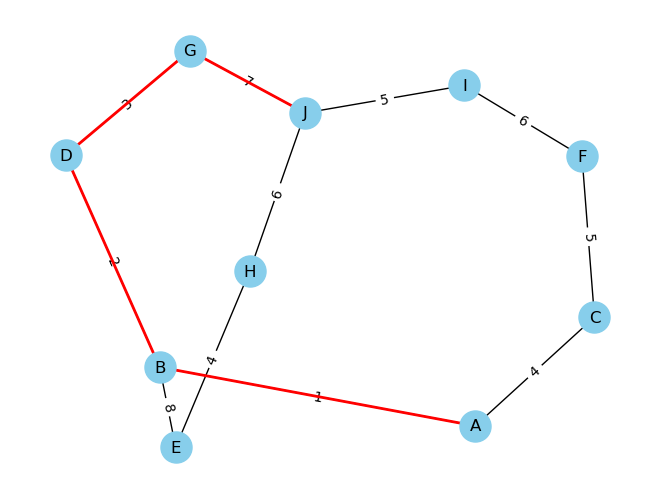

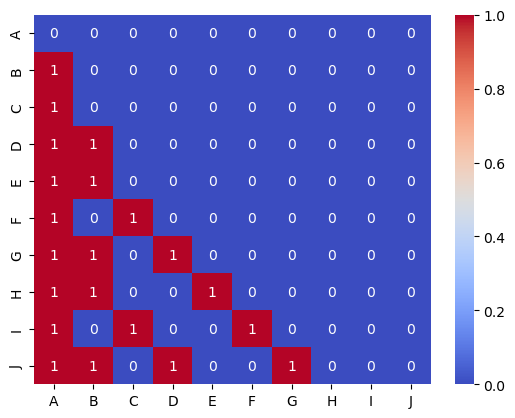

DLS: ['A', 'C', 'F', 'I', 'J']


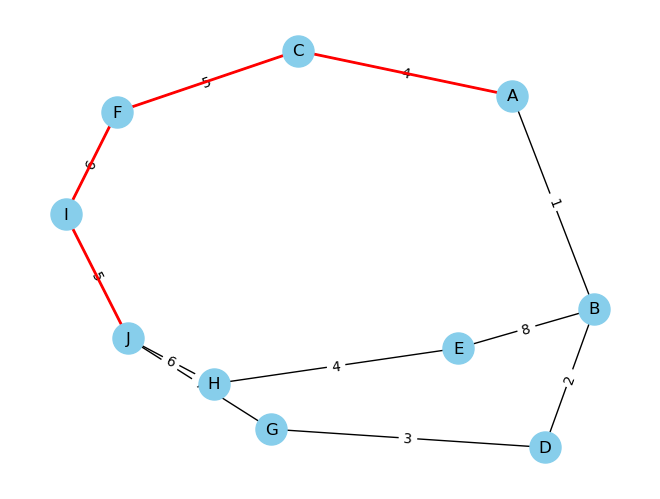

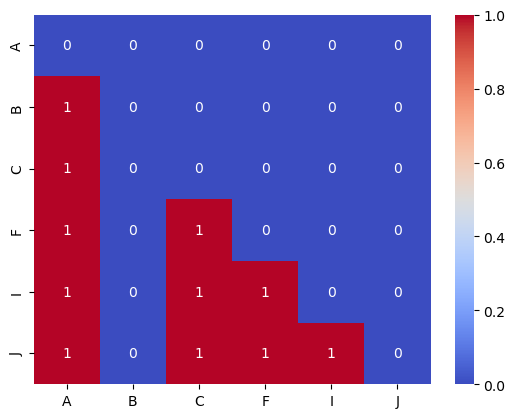

IDS: ['A', 'C', 'F', 'I', 'J']


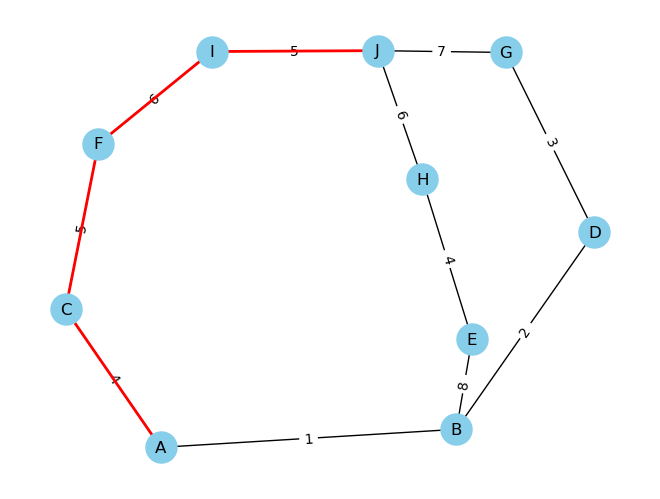

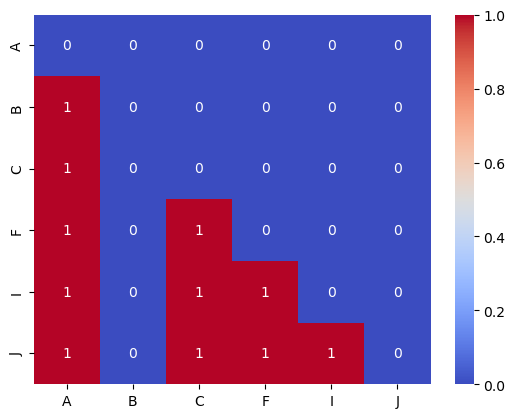

A*: ['A', 'B', 'D', 'G', 'J']


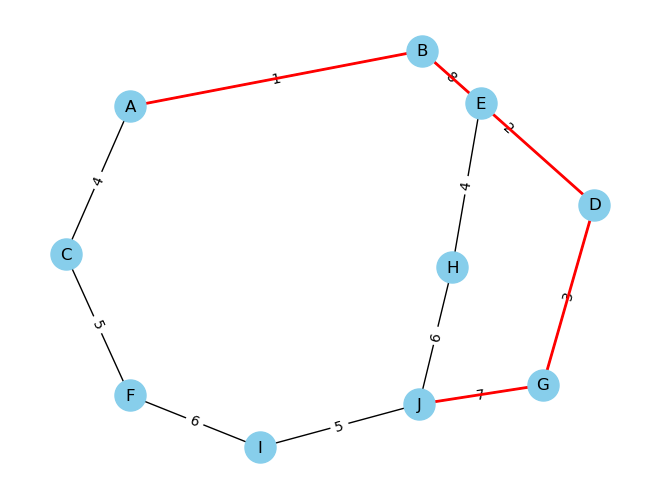

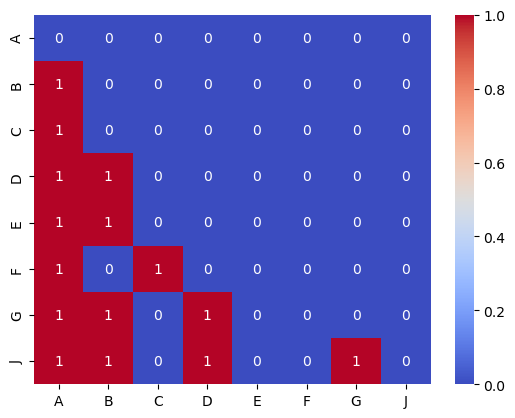

In [7]:
# task: use 7 search algorithms to solve shortest path problem
# 1. BFS
# 2. DFS
# 3. UCS
# 4. DLS
# 5. IDS
# 6. A*
# 7. GS

# define the graph
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 8},
    'C': {'A': 4, 'F': 5},
    'D': {'B': 2, 'G': 3},
    'E': {'B': 8, 'H': 4},
    'F': {'C': 5, 'I': 6},
    'G': {'D': 3, 'J': 7},
    'H': {'E': 4, 'J': 6},
    'I': {'F': 6, 'J': 5},
    'J': {'G': 7, 'H': 6, 'I': 5}
}

# define the heuristic function
heuristic = {
    'A': 10,
    'B': 9,
    'C': 8,
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 0
}

# define the start and goal node
start = 'A'
goal = 'J'

# define the search algorithms
def bfs(graph, start, goal):
    frontier = queue.Queue()
    frontier.put(start)
    visited = {start: None}
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for next in graph[current]:
            if next not in visited:
                frontier.put(next)
                visited[next] = current
    return visited

def dfs(graph, start, goal):
    frontier = queue.LifoQueue()
    frontier.put(start)
    visited = {start: None}
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for next in graph[current]:
            if next not in visited:
                frontier.put(next)
                visited[next] = current
    return visited

def ucs(graph, start, goal):
    frontier = queue.PriorityQueue()
    frontier.put((0, start))
    visited = {start: None}
    cost = {start: 0}
    while not frontier.empty():
        current_cost, current = frontier.get()
        if current == goal:
            break
        for next in graph[current]:
            new_cost = current_cost + graph[current][next]
            if next not in cost or new_cost < cost[next]:
                cost[next] = new_cost
                frontier.put((new_cost, next))
                visited[next] = current
    return visited

def dls(graph, start, goal, limit):
    frontier = queue.LifoQueue()
    frontier.put((start, 0))  # Store the depth with each node
    visited = {start: None}
    while not frontier.empty():
        current, depth = frontier.get()
        if current == goal:
            break
        if depth < limit:  # Only add neighbors if current depth is less than limit
            for next in graph[current]:
                if next not in visited:
                    frontier.put((next, depth + 1))  # Increment depth for each neighbor
                    visited[next] = current
    return visited

def ids(graph, start, goal):
    limit = 0
    while True:
        visited = dls(graph, start, goal, limit)
        if goal in visited:
            return visited
        limit += 1

def a_star(graph, start, goal, heuristic):
    frontier = queue.PriorityQueue()
    frontier.put((0, start))
    visited = {start: None}
    cost = {start: 0}
    while not frontier.empty():
        current_cost, current = frontier.get()
        if current == goal:
            break
        for next in graph[current]:
            new_cost = cost[current] + graph[current][next]
            if next not in cost or new_cost < cost[next]:
                cost[next] = new_cost
                priority = new_cost + heuristic[next]
                frontier.put((priority, next))
                visited[next] = current
    return visited

def gs(graph, start, goal, heuristic):
    frontier = queue.PriorityQueue()
    frontier.put((0, start))
    visited = {start: None}
    cost = {start: 0}
    while not frontier.empty():
        current_cost, current = frontier.get()
        if current == goal:
            break
        for next in graph[current]:
            new_cost = cost[current] + graph[current][next]
            if next not in cost or new_cost < cost[next]:
                cost[next] = new_cost
                priority = heuristic[next]
                frontier.put((priority, next))
                visited[next] = current
    return visited

# define the function to get the path
def get_path(visited, goal):
    if goal not in visited:
        return None
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current]
    path.reverse()
    return path

# define the function to plot the graph
def plot_graph(graph, path):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
        for neighbor in graph[node]:
            G.add_edge(node, neighbor, weight=graph[node][neighbor])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    for i in range(len(path) - 1):
        nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1])], edge_color='r', width=2)
    plt.show()

# define the function to plot the heatmap
def plot_heatmap(visited):
    nodes = list(visited.keys())
    nodes.sort()
    matrix = np.zeros((len(nodes), len(nodes)))
    for i in range(len(nodes)):
        current = nodes[i]
        while current is not None:
            if current in visited:
                next = visited[current]
                if next is not None:
                    j = nodes.index(next)
                    matrix[i][j] = 1
            current = visited[current]
    heatmap(matrix, xticklabels=nodes, yticklabels=nodes, cmap='coolwarm', annot=True)
    plt.show()

# run the search algorithms
visited = bfs(graph, start, goal)
path = get_path(visited, goal)
print('BFS:', path)
plot_graph(graph, path)
plot_heatmap(visited)

visited = dfs(graph, start, goal)
path = get_path(visited, goal)
print('DFS:', path)
plot_graph(graph, path)
plot_heatmap(visited)

visited = ucs(graph, start, goal)
path = get_path(visited, goal)
print('UCS:', path)
plot_graph(graph, path)
plot_heatmap(visited)

visited = dls(graph, start, goal, 4)
path = get_path(visited, goal)
if path is not None:
    print('DLS:', path)
    plot_graph(graph, path)
    plot_heatmap(visited)
else:
    print('DLS: goal not reachable within depth limit')

visited = ids(graph, start, goal)
path = get_path(visited, goal)
print('IDS:', path)
plot_graph(graph, path)
plot_heatmap(visited)

visited = a_star(graph, start, goal, heuristic)
path = get_path(visited, goal)
print('A*:', path)
plot_graph(graph, path)
plot_heatmap(visited)



